<a href="https://colab.research.google.com/github/sankets96/Credit-card-fraud/blob/main/Sanket_suryavanshi_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Stock price forcasting using data yahoo finanace**

In [ ]:
!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 6.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=75001621ec320104e1fa8a0c90b68cbf6b3f583258150ef0d04a7dd5ddf9a5d6
  Stored in directory: /root/.cache/pip/wheels/4b

**Collecting data**

In [ ]:
stock = yf.download('AAPL',start='2019-01-01',end='2021-06-12',progress=False)
stock.head(10)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.277523,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.464802,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.936085,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.856094,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.539619,164101200
2019-01-09,37.822498,38.632500,37.407501,38.327499,37.160126,180396400
2019-01-10,38.125000,38.492500,37.715000,38.450001,37.278900,143122800
2019-01-11,38.220001,38.424999,37.877499,38.072498,36.912895,108092800
2019-01-14,37.712502,37.817501,37.305000,37.500000,36.357834,129756800


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 616 entries, 2019-01-02 to 2021-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       616 non-null    float64
 1   High       616 non-null    float64
 2   Low        616 non-null    float64
 3   Close      616 non-null    float64
 4   Adj Close  616 non-null    float64
 5   Volume     616 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 33.7 KB


In [ ]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,616.000000,616.000000,616.000000,616.000000,616.000000,6.160000e+02
mean,83.573527,84.583336,82.568896,83.617735,82.605857,1.283287e+08
std,32.665202,33.028827,32.103761,32.547876,32.656127,5.941233e+07
min,35.994999,36.430000,35.500000,35.547501,34.464802,4.544800e+07
25%,52.110626,52.360000,51.743126,52.155624,50.927447,8.861022e+07
50%,75.176250,76.077499,74.543751,75.741249,74.626060,1.119740e+08
75%,118.947498,120.439999,116.824999,119.022497,117.939245,1.481690e+08
max,143.600006,145.089996,141.369995,143.160004,142.101822,4.265100e+08


In [ ]:
df = stock.copy()   #for copy datset

Data preperation

In [ ]:
stock.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Data is porperly cling next step to visualising

In [ ]:
#candlestick Charts
!pip install plotly


In [ ]:
import plotly.graph_objects as go 

In [ ]:
stock =stock.reset_index()
for i in ['Open','High','Close','Low'] :
  stock[i] = stock[i].astype('float64')

In [ ]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.277523,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.464802,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.936085,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.856094,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.539619,164101200


**Data visualaizationt**

**Candlestick chart**

In [ ]:
fig =plt.figure(figsize=(15,15))
fi = go.Figure(data=[go.Candlestick(x=stock['Date'],open=stock['Open'],high=stock['High'],low=stock['Low'],close=stock['Close'])])

fi.show()

<Figure size 1080x1080 with 0 Axes>

Candlestick chart Range slide used for technical analyisis

**Line plot**

In [ ]:
import plotly.express as px
f = px.line(stock,x='Date',y='Open',title='Stock prices')
f.show()

Line chart used for fundamental and technical analysis decide strategies
plot graph for date vs open

**OHLC chart**

In [ ]:
#similar to candlestick chart are import as they on the closing price

In [ ]:
fig = plt.figure(figsize=(15,15))
fo = go.Figure(data=go.Ohlc(x=stock['Date'],open=stock['Open'],high=stock['High'],low=stock['Low'],close=stock['Close']))
fo.show()

<Figure size 1080x1080 with 0 Axes>

**Last 5 years graph**

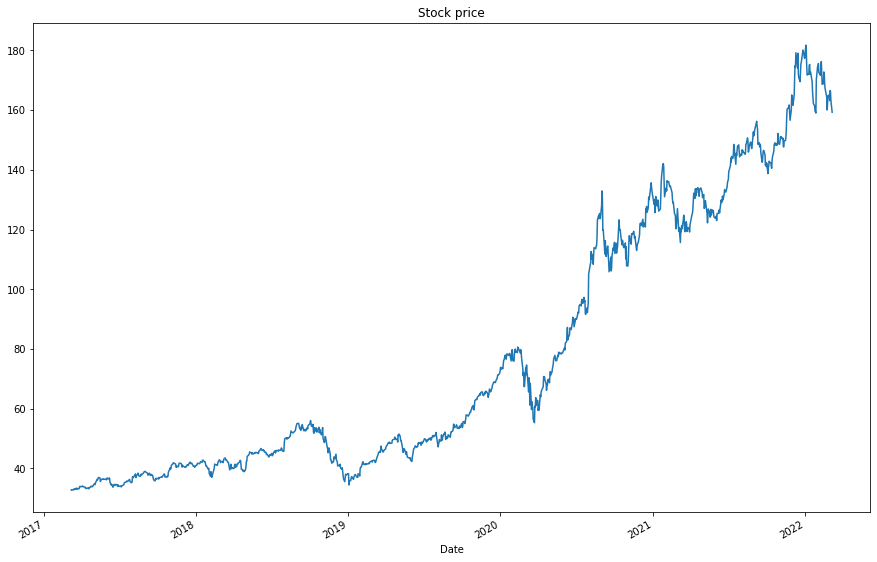

In [ ]:
fig = plt.figure(figsize=(15,10))
ticker = yf.Ticker('AAPL')
aapl_df = ticker.history(period='5y')
aapl_df['Close'].plot(title='Stock price')

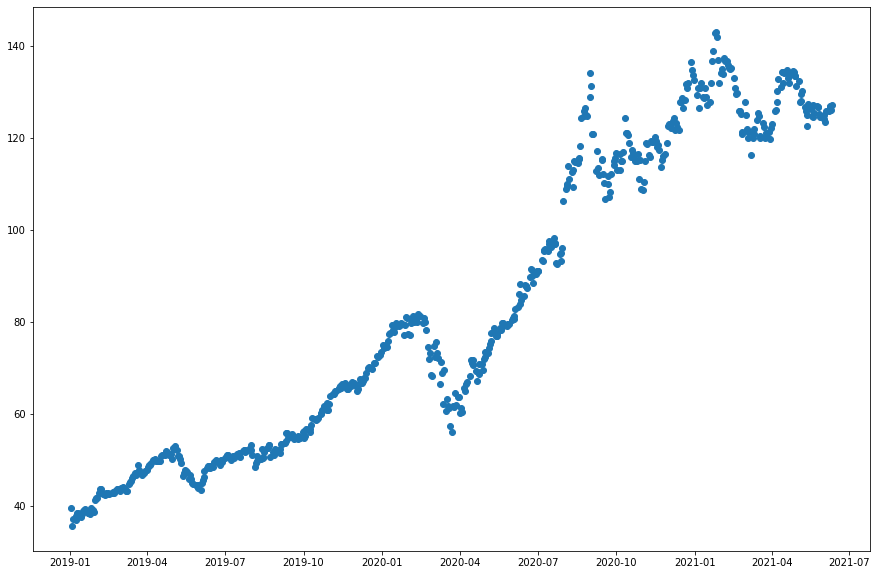

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.scatter(stock.Date,stock.Close)

**Relevant informationt**

In [ ]:
ticker.actions

,Dividends,Stock Splits
Date,,
2017-05-11,0.1575,0.0
2017-08-10,0.1575,0.0
2017-11-10,0.1575,0.0
2018-02-09,0.1575,0.0
2018-05-11,0.1825,0.0
2018-08-10,0.1825,0.0
2018-11-08,0.1825,0.0
2019-02-08,0.1825,0.0
2019-05-10,0.1925,0.0


In [ ]:
ticker.dividends

Date
2017-05-11    0.1575
2017-08-10    0.1575
2017-11-10    0.1575
2018-02-09    0.1575
2018-05-11    0.1825
2018-08-10    0.1825
2018-11-08    0.1825
2019-02-08    0.1825
2019-05-10    0.1925
2019-08-09    0.1925
2019-11-07    0.1925
2020-02-07    0.1925
2020-05-08    0.2050
2020-08-07    0.2050
2020-11-06    0.2050
2021-02-05    0.2050
2021-05-07    0.2200
2021-08-06    0.2200
2021-11-05    0.2200
2022-02-04    0.2200
Name: Dividends, dtype: float64

In [ ]:
ticker.splits

Date
2020-08-31    4.0
Name: Stock Splits, dtype: float64

In [ ]:
ticker.sustainability  #display the sustanabilty

,Value
2022-2,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,6.86
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [ ]:
ticker.recommendations   #used to buying and seeling the diffrent ferm

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main
...,...,...,...,...
2022-01-28 13:01:39,Deutsche Bank,Buy,,main
2022-01-28 14:19:01,New Street Research,Neutral,Sell,up
2022-01-28 15:10:56,Oppenheimer,Outperform,,main


In [ ]:
ticker.calendar  #used to know earning and revenue of comapny

,0,1
Earnings Date,2022-04-26 20:00:00,2022-05-02 20:00:00
Earnings Average,1.43,1.43
Earnings Low,1.34,1.34
Earnings High,1.56,1.56
Revenue Average,93981100000,93981100000
Revenue Low,90042000000,90042000000
Revenue High,100444000000,100444000000


In [ ]:
ticker.major_holders  #it gives major holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,59.52%,% of Shares Held by Institutions
2,59.56%,% of Float Held by Institutions
3,5403,Number of Institutions Holding Shares


In [ ]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.277531,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.464806,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.936077,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.856094,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.539616,164101200


Train_test data

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.svm import SVR    #use SVR algorithem 

In [ ]:
x = stock['Date']
y = stock['Close']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()


In [ ]:
x = scale.fit_transform(x.values.reshape(-1,1))     #it contain 2D array covert into 2D



In [ ]:
y = scale.fit_transform(y.values.reshape(-1,1))  #1D to 2 D

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,shuffle=False,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(492, 1)
(124, 1)
(492, 1)
(124, 1)


**Model fitting**

In [ ]:
model = SVR(kernel='rbf')    

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [ ]:
y_pred = model.predict(x_test)

**Prediction new result**

In [ ]:
y_pred.shape

(124,)

In [ ]:
y_test.shape

(124, 1)

In [ ]:
y_test = scale.inverse_transform(y_test)  

In [ ]:
y_pred = y_pred.reshape(-1,1)

In [ ]:
y_pred.shape

(124, 1)

In [ ]:
y_pred = scale.inverse_transform(y_pred)

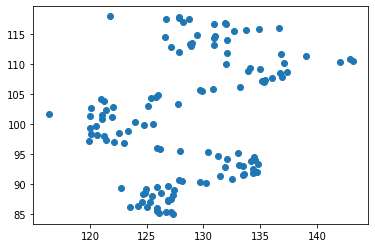

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
y_test  #y testing data

array([[121.77999878],
       [127.87999725],
       [127.80999756],
       [128.69999695],
       [126.66000366],
       [128.22999573],
       [131.88000488],
       [130.96000671],
       [131.97000122],
       [136.69000244],
       [134.86999512],
       [133.72000122],
       [132.69000244],
       [129.41000366],
       [131.00999451],
       [126.59999847],
       [130.91999817],
       [132.05000305],
       [128.97999573],
       [128.80000305],
       [130.88999939],
       [128.91000366],
       [127.13999939],
       [127.83000183],
       [132.02999878],
       [136.86999512],
       [139.07000732],
       [142.91999817],
       [143.16000366],
       [142.05999756],
       [137.08999634],
       [131.96000671],
       [134.13999939],
       [134.99000549],
       [133.94000244],
       [137.38999939],
       [136.75999451],
       [136.91000366],
       [136.00999451],
       [135.38999939],
       [135.13000488],
       [135.36999512],
       [133.19000244],
       [130

In [ ]:
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import confusion_matrix
y_pred    #y predict values by the model


array([[117.9125975 ],
       [117.78788001],
       [117.66032318],
       [117.52997093],
       [117.39686743],
       [116.98149485],
       [116.83783282],
       [116.69164378],
       [116.54297312],
       [115.92438671],
       [115.76399318],
       [115.60139276],
       [115.43663148],
       [114.75689897],
       [114.58202422],
       [114.4052648 ],
       [114.2266666 ],
       [114.04627543],
       [113.49480066],
       [113.30769359],
       [113.11902089],
       [112.9288276 ],
       [112.73715858],
       [111.95661542],
       [111.75823355],
       [111.55864069],
       [111.35788012],
       [110.74902086],
       [110.54401669],
       [110.33805693],
       [110.13118308],
       [109.92343631],
       [109.29536489],
       [109.08453109],
       [108.87302488],
       [108.66088526],
       [108.44815083],
       [107.80675859],
       [107.5920228 ],
       [107.37687907],
       [107.16136351],
       [106.9455118 ],
       [106.07944133],
       [105

The confusion matrix is used to tell you how many predictions were classified correctly or incorrectly. You are looking at a regression model, which gives you a continous output
it except expected class predictions, not floating point numbers

In [ ]:
cutoff = 87.00                             # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1 

In [ ]:
y_test_classes = np.zeros_like(y_pred)
y_test_classes[y_test > cutoff] = 1

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(y_test_classes,y_pred_classes)

array([[  0,   0],
       [ 10, 114]])

In [ ]:
metrics.classification_report(y_test_classes,y_pred_classes)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



'              precision    recall  f1-score   support\n\n         0.0       0.00      0.00      0.00         0\n         1.0       1.00      0.92      0.96       124\n\n    accuracy                           0.92       124\n   macro avg       0.50      0.46      0.48       124\nweighted avg       1.00      0.92      0.96       124\n'

In [ ]:
accuracy_score(y_test_classes,y_pred_classes)*100

91.93548387096774